# Token Economy Cards

Basic description.

## Contents

1. Abstract
1. Card Design
1. Corpus
    1. Literature Corpus
    1. Target Word List
1. Letters and Digraphs
1. The Distribution
    1. Importing Libraries
    1. Counting Letters
    1. Plotting the Distribution

## 1. Card Design

One half of a face will contain a letter or digraph (as well as a preview of the letter on the other side). The other half of the face will have a space a space for picture icons that will vary by type, color, and number.

## 2. Corpus

Broadly define and explain the significance of a corpus.

#### 2A Literature Corpora

Getting a corpus of writing aimed at children is more difficult than you might imagine. Most books that children are likely to read today are protected by copyright and so their full texts are hard to get a hold of. Such corpora do exist, but they are not available to the public. It turns out that grabbing (admittedly very old) books from Project Gutenberg is the best option for my purposes.

Shibamouli Lahiri has already collected a bunch of works from Project Gutenberg and done the arduous work of removing the project's licensing and other stuff, making them suitable for language processing. The dataset can be found here https://web.eecs.umich.edu/~lahiri/gutenberg_dataset.html

I picked, completely at my own whims, a selection of children's and adult literature.

* Children's Literaure Corpus
    * Lewis Carroll, *Alice's Adventures in Wonderland*
    * Robert Louis Stevenson, *Treasure Island*
    * Oscar Wilde, *The Happy Prince and Other Tales*
    * Lyman Frank Baum, *The Wonderful Wizard of Oz*
    * Rudyard Kipling, *The Jungle Book*
    * Lucy Maud Montgomery, *Anne Of Green Gables*
* Adult Literature Corpus
    * Bertrand Russell, *Our Knowledge of the External World as a Field for Scientific Method in Philosophy*
    * Herman *Melville, Moby Dick*
    * Jane Austen, *Pride and Prejudice*
    * Jonathan Swift, *A Modest Proposal*
    * Mary Shelley, *Frankenstein; or the Modern Prometheus*

In [1]:
childrens_literature = ['Lewis Carroll___Alice\'s Adventures in Wonderland.txt',
                        'Lucy Maud Montgomery___Anne Of Green Gables.txt',
                        'Lyman Frank Baum___The Wonderful Wizard of Oz.txt',
                        'Oscar Wilde___The Happy Prince and Other Tales.txt',
                        'Robert Louis Stevenson___Treasure Island.txt',
                        'Rudyard Kipling___The Jungle Book.txt']

adult_literature = ['Bertrand Russell___Our Knowledge of the External World as a Field for Scientific Method in Philosophy.txt',
                    'Herman Melville___Moby Dick.txt',
                    'Jane Austen___Pride and Prejudice.txt',
                    'Jonathan Swift___A Modest Proposal.txt',
                    'Mary Shelley___Frankenstein.txt']

#### 2B Target Word List Corpus

A significant part of my day job involves preparing primary school students, who are learning English as s second language, to participate in one of the Cambridge English Exams. These exams, as well as the students I teach, cover a wide range of abilities. However, I believe that it is the youngest students who will benefit the most from the sort of game-like token economy item I am designing, so I would like to make a mini-corpus from their official vocabulary list for young learners, mostly out of curiosity.

*FYI, I made the word list by processing a PDF with regex. It caused mult-word terms (like sports center) to be split over multiple lines. It's still good enough for counting letters, but don't try using it as a teaching aid.*

In [2]:
yle = ['yle-words.csv']

## Letters and Digraphs

I've spent a lot of time playing word games with little kids who are learning basic English vocabulary, and one trend I have noticed is that they seldom produce words with consonant digraphs, despite having been taught these words and successfully doing any number of quizzes and worksheets demanding them to be spelled out. Perhaps this has something to do with the interaction in their minds between English and their native language (Chinese), but I don't have the expertise to weigh in on why this happens. I just know that I want to encourage them to make words with these features and I hope including cards with digraphs on them will help with that.

In [3]:
digraphs = 'bl cl fl br cr fr gl pl sl dr pr tr sm sn st sw ng nk sh ch th wh qu'.split()

## The Distributions

Let's get started with counting letters.

#### Importing Libraries

The `Counter` class within the `collections` module of Python's standard library is incredibly useful. It's a kind special-purpose dictionary that, like it says on the tin, helps you count things. It should be your first resort whenever you need to tally something.

In [4]:
import numpy as np
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords

#### The Counting Function

I won't be satisfied by just running the books through a `Counter` and calling it a day. Why? Consider the letter *h*. A lot of words contnain this letter: *hello*, *happy*, *hippopotamus*, *heliocentric*, *hour*, etc. But if you take a look at a text, you'll see that *h* is very often a member of on of those digraphs I'm interested in: *this*, *what*, *Thursday*, *who*, etc. If we count every occurence of *th* and *wh* and then count every occurnece of *h*, then the singular letter will be over-represented in the final distribution because it will have been counted twice.

This counting function first tallies the occurences of each digraph and then removes them from the text before counting the individual letters that remain. Honestly, this could have been done with a nasty-looking bit of regex, thus avoiding the extra step of removing characters, but the corpora are small enough that this isn't a big deal, and besides, trying to solve a problem with regex often just leaves you with two problems to solve.

This function also includes an option to exclude *stop words* which are common function words that don't carry much meaning on their own, like *the*, *is*, or *with*. I'm concerned that these stop words, which may take up a huge amount of the text, may overpower the more interesting nouns, verbs, and whatnot that I want my students to learn.

In [23]:
def count_digraphs_and_letters(corpus, digraphs, name=None, remove_stopwords=False):

    counter = Counter()
    eng_stopwords = stopwords.words('english')

    for item in corpus:
        with open(item, 'r') as file:
            text = file.read().lower()
            if remove_stopwords:
                text = ' '.join([word for word in text.split() if word not in eng_stopwords])
        for digraph in digraphs:
            occurences = text.count(digraph)
            counter[digraph] += occurences
            text = text.replace(digraph, ' ')
        counter.update(char for char in ' '.join(text) if char in 'abcdefghijklmnopqrstuvwxyz')
    
    df = pd.DataFrame.from_dict(counter, orient='index')
    df.reset_index(inplace=True)
    df.columns = ['letter', 'count']
    df['proportion'] = df['count'] / df['count'].sum()
    df.sort_values(by='count', ascending=False, inplace=True)
    df.reset_index(inplace=True, drop=True)
    df.name = name
    
    return df

#### Tally Ho!

Now it's finally time to count the digraphs and letters.

In [31]:
c_dist   = count_digraphs_and_letters(childrens_literature, digraphs,)
c_dist_r = count_digraphs_and_letters(childrens_literature, digraphs, remove_stopwords=True)
a_dist   = count_digraphs_and_letters(adult_literature, digraphs)
a_dist_r = count_digraphs_and_letters(adult_literature, digraphs, remove_stopwords=True)
y_dist   = count_digraphs_and_letters(yle, digraphs)

#### The Super Scrabble Distribution

I'm interested in seeing how the professionals have already approached this puzzle. I will compare my corpora with the distribution of letters in a set of Super Scrabble. I chose this version rather then the original because it was designed to make it easier to make more plurals and third-person pronouns, which is something I would also like my younger students to be more comfortable with.

In [30]:
scrabble_letters = list('eaotinrsludgcmbphfwyvkjxqz')
scrabble_counts  = [24, 16, 15, 15 ,13, 13, 13, 10, 7, 7, 8, 5, 6, 6, 4, 4, 5, 4, 4, 4, 3, 2, 2, 2, 2, 2]

scrabble = pd.DataFrame({'letter': scrabble_letters, 'count': scrabble_counts})
scrabble['proportion'] = scrabble['count'] / scrabble['count'].sum()
scrabble = scrabble.reindex(columns=['letter', 'count', 'proportion'])
scrabble.sort_values(by='count', ascending=False, inplace=True)

Now that all of the distributions are finished, we can take a look at everything side-by-side.

In [40]:
distributions = [c_dist, c_dist_r, a_dist, a_dist_r, y_dist, scrabble]
concat_letters = pd.concat([df[['letter', 'count']] for df in distributions], axis=1)
concat_letters.columns = ['ch letter', 'ch count',
                          'ch -sw letter', 'ch -sw count',
                          'ad letter', 'ad count',
                          'ad -sw letter', 'ad -sw count',
                          'yle letter', 'yle count',
                          'scr letter', 'scr count']
concat_letters

,ch letter,ch count,ch -sw letter,ch -sw count,ad letter,ad count,ad -sw letter,ad -sw count,yle letter,yle count,scr letter,scr count
0,e,153112,e,104926,e,274158,e,199265,e,951.0,e,24.0
1,a,105571,a,64783,a,171086,a,110434,a,677.0,a,16.0
2,o,94214,i,57359,o,158938,i,108222,o,630.0,o,15.0
3,i,82454,o,56405,i,155168,o,94850,r,489.0,t,15.0
4,n,71813,r,44718,n,131530,n,88992,i,488.0,i,13.0
5,t,64513,n,44230,s,116189,s,87052,t,441.0,n,13.0
6,s,58147,l,43283,t,112055,r,82031,n,412.0,r,13.0
7,r,58140,s,43054,r,103631,t,72904,l,362.0,s,10.0
8,d,57758,d,40231,d,85609,l,66793,s,324.0,l,7.0
9,l,49540,t,39578,l,76885,d,65042,u,250.0,u,7.0


Very interesting, but also difficult to interpret. Certainly there are some differences, but they're hard to appreciate in this format. In the next section I'll add a splash of color to illuminate the differences.


As an aside, I'm surpised to see that the two literature corpora both have some occurences of *q* outside of *qu*. In English, this usually only happens with loan words from other languages, like *qi* from Mandarin Chinese (e.g. 氣) or *qabala* from Hebrew where it is a Latinized version of the letter *qoph*, ק. I don't know which books this is happening in, but the far-flung adventures in a few them certainly raises the opportunity to include a few loan words of this nature. In the end, however, I'll definitely not have separate cards for *q* and *qu*, but rather have them share a single one.

#### Visualizations

Matplotlib is the standard library for making plots with Python and its abilites are extended with Seaborn.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='monospace', style='white')
%matplotlib inline

To highlight the differences between the distributions I'll create a diverging color palette with colors mapped to the letters in the children's literature corpus, sorted by occurences. Then I'll use that palette, with colors still mapped to specific letters, on the other distributions. Any differences will pop out by virtue of being out of sequence.

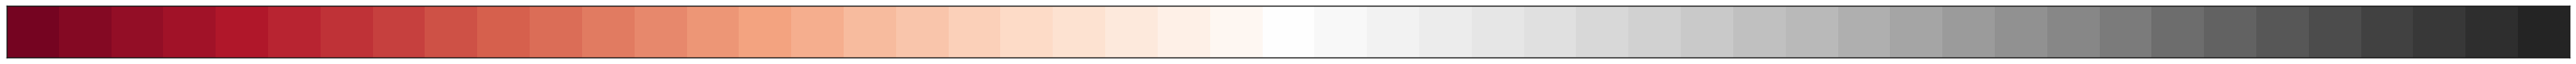

In [10]:
palette = sns.color_palette(palette='RdGy', n_colors=c_dist.shape[0])
letter_palette = pd.Series(palette, index=c_dist['letter']).to_dict()
sns.palplot(palette)

Plotting the absolute counts won't be useful because of the great size differences between the corpora and the Super Scrabble distribution, but plotting the proportions of occurences of each letter relative to the sum of all of them will do fine.

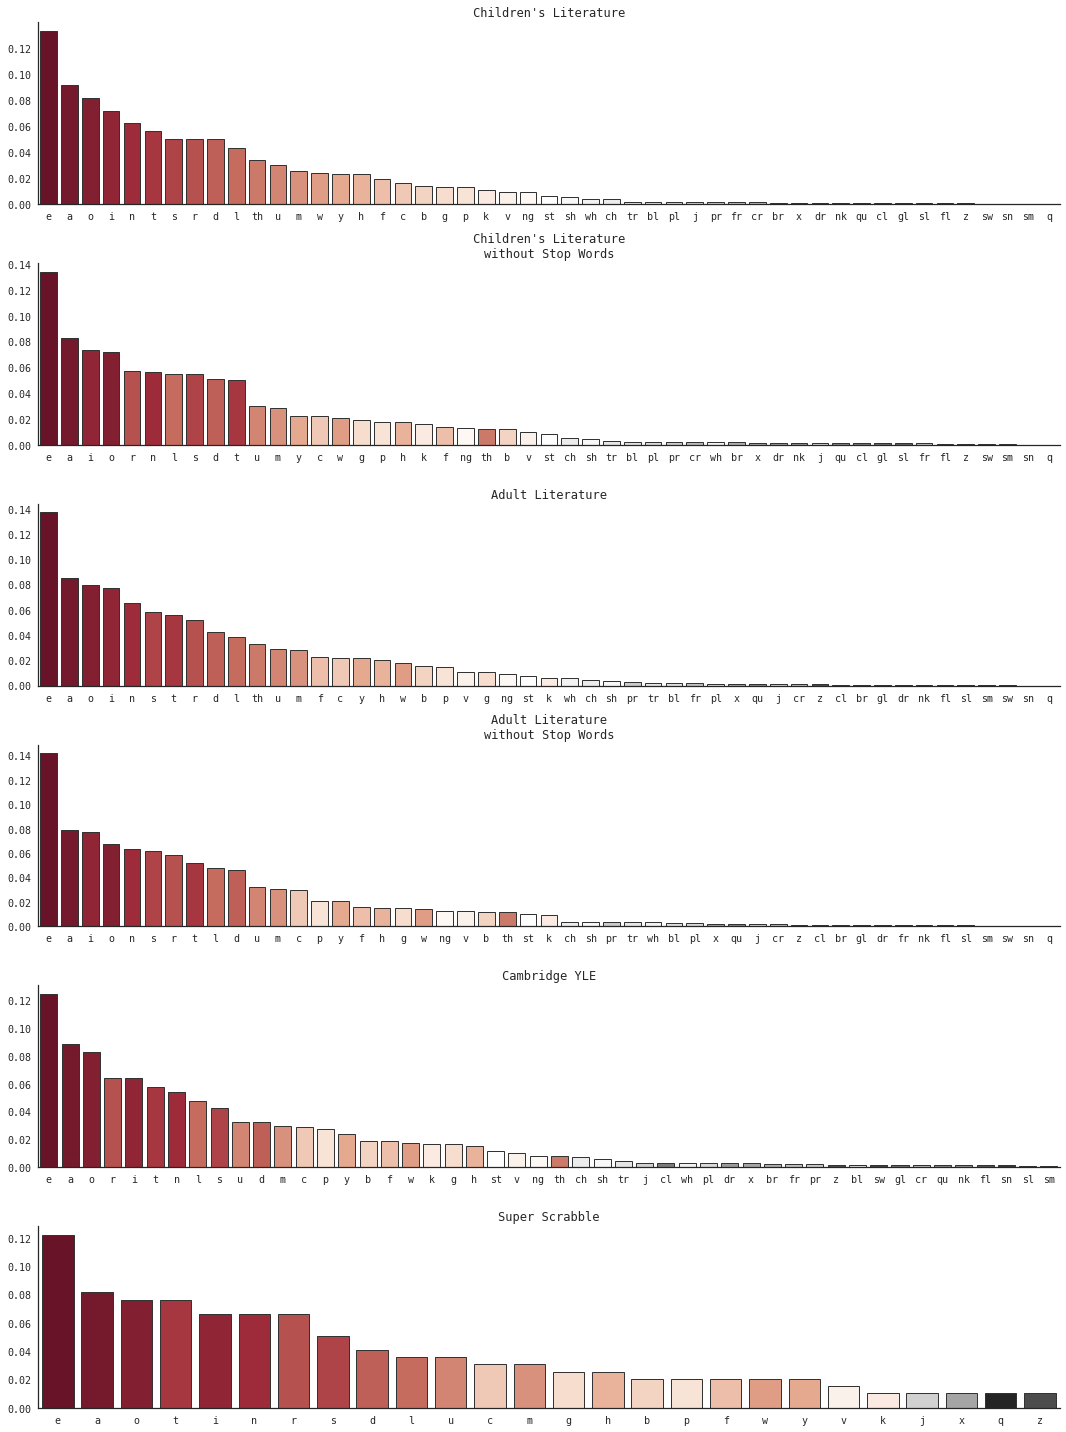

In [50]:
fig, ax = plt.subplots(nrows=6, figsize=(15, 20), facecolor='w')

for index, df in enumerate([c_dist, c_dist_r, a_dist, a_dist_r, y_dist, scrabble]):
    sns.barplot(data=df, x='letter', y=df['proportion'], palette=letter_palette, ax=ax[index], linewidth=1, edgecolor='.2')
    ax[index].set(xlabel='', ylabel='')

ax[0].set_title('Children\'s Literature')
ax[1].set_title('Children\'s Literature\nwithout Stop Words')
ax[2].set_title('Adult Literature')
ax[3].set_title('Adult Literature\nwithout Stop Words')
ax[4].set_title('Cambridge YLE')
ax[5].set_title('Super Scrabble')

fig.tight_layout()
sns.despine()
plt.show()

It shouldn't surprise anyone that some letters/digraphs are a lot more common than others, but it's nevertheless amazing to see just how great the differences can be. The letter *j* doesn't feel all that uncommon, but for every single one in the children'e literature corpus the letter *e* appears 83 times! Compare that to the distribution of Super Scrabble letters where for every *j* there are only 12 *e*s.

Unfortunately, we can't see the color of many of the bars clearly, stopping the plot from showing the different orders of the distributions very well, so I'll make another plot where each letter/digraph gets the same representation along the $x$ axis.

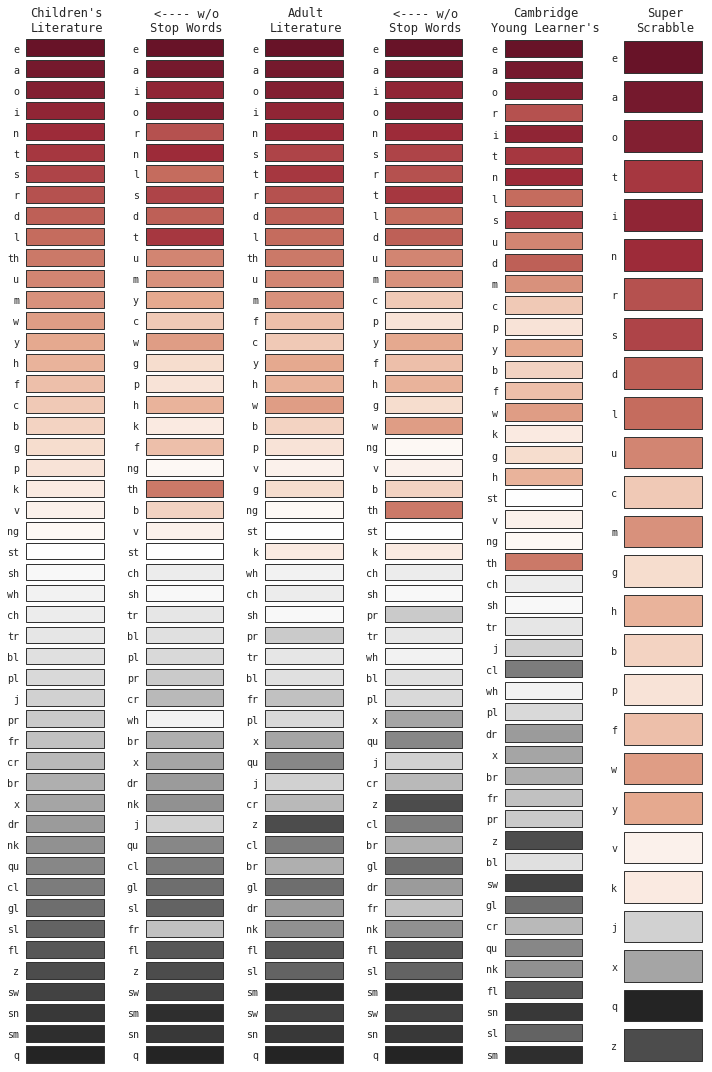

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(10, 15), facecolor='w')

for index, df in enumerate([c_dist, c_dist_r, a_dist, a_dist_r, y_dist, scrabble]):
    # x = proportion^0 will set all values to 1.
    sns.barplot(data=df, y='letter', x=df['proportion']**0, palette=letter_palette, ax=ax[index], linewidth=1, edgecolor='.2')
    ax[index].set(xlabel='', ylabel='', xticklabels='', yticklabels=df['letter'])

ax[0].set_title('Children\'s\nLiterature')
ax[1].set_title('<---- w/o\nStop Words')
ax[2].set_title('Adult\nLiterature')
ax[3].set_title('<---- w/o\nStop Words')
ax[4].set_title('Cambridge\nYoung Learner\'s')
ax[5].set_title('Super\nScrabble')

fig.tight_layout()
sns.despine(left=True, bottom=True)
plt.show()

Removing stop words really has an impact on the relative frequency of letters/digraphs. The digraphs *th*, *wh*, and *fr* in particular are all knocked down quite a bit. It makes me wonder: outside of function words, how much do these digraphs really show up in the kind of simple English that my students are working with and how should their scarcity affect the token economy?

Just like *q* and *qu* will share a space on a card, groups of digraphs can do so as well.

* bl, cl, fl
* sl, gl, pl
* br, cr, fr
* dr, pr, tr
* sm, sn, st, sw
* ng, nk
* sh, ch, th
* wh, qu, q

In [75]:
c_dist.set_index('letter', drop=False).loc[['e', 'a', 'o', 'i']].sum()

letter            eaoi
count           435351
proportion    0.377839
dtype: object